#**Extreme Overfitting Example**

Your task is to simulate a set of random images and their associated labels. Then, I want you to fit a neural network to the random data. Finally, report how accurate your model is on the training data, and visualize training accuracy across epochs. 

Descriptive statistics for the training data:
                  0
count  3.920000e+06
mean   5.000028e-01
std    2.887777e-01
min    4.542561e-08
25%    2.497290e-01
50%    4.999126e-01
75%    7.501404e-01
max    9.999997e-01

The first ten labels are [1. 7. 4. 7. 6. 0. 8. 6. 2. 6.]



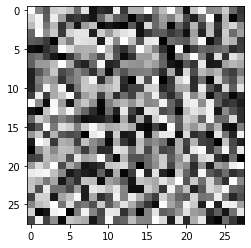

(5000, 784)
(5000, 1)


In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras 
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from PIL import Image as im

# Let's synthesize 20,000 images comprised of random pixel values.
train_images_random = np.random.random((5000, 28,28))
df = pd.DataFrame(train_images_random.reshape(-1))
print(f'Descriptive statistics for the training data:\n{df.describe()}\n')

# And let's make-up labels for them. 
train_labels_random = np.floor(np.random.random(5000)*10)
print(f'The first ten labels are {train_labels_random[:10]}\n')

# Here's what the first picture looks like.
plt.imshow(train_images_random[0],cmap=plt.cm.binary)
plt.show()

# Let's first convert each pixel matrix into a vector. 
train_images_random = train_images_random.reshape(5000,28*28)
train_labels_random = train_labels_random.reshape(5000,1)
print(train_images_random.shape)
print(train_labels_random.shape)

Okay, let's now fit a model to our simulated data. 

In [2]:
# Now we can setup our model. 
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Accuracy is surpassing 60% already! Let it run and you'll see how well it does. 
history = model.fit(train_images_random, train_labels_random, epochs=50, batch_size=128)

Epoch 1/50
40/40 [==============================] - 1s 11ms/step - loss: 2.6597 - accuracy: 0.1020
Epoch 2/50
40/40 [==============================] - 0s 11ms/step - loss: 2.3692 - accuracy: 0.1076
Epoch 3/50
40/40 [==============================] - 0s 11ms/step - loss: 2.3408 - accuracy: 0.1100
Epoch 4/50
40/40 [==============================] - 0s 11ms/step - loss: 2.3171 - accuracy: 0.1254
Epoch 5/50
40/40 [==============================] - 0s 11ms/step - loss: 2.2993 - accuracy: 0.1338
Epoch 6/50
40/40 [==============================] - 0s 11ms/step - loss: 2.2856 - accuracy: 0.1434
Epoch 7/50
40/40 [==============================] - 0s 12ms/step - loss: 2.2661 - accuracy: 0.1592
Epoch 8/50
40/40 [==============================] - 0s 12ms/step - loss: 2.2390 - accuracy: 0.1812
Epoch 9/50
40/40 [==============================] - 0s 11ms/step - loss: 2.2192 - accuracy: 0.1788
Epoch 10/50
40/40 [==============================] - 0s 11ms/step - loss: 2.1964 - accuracy: 0.2084
Epoch 11/

And just for practice, let's plot the model's loss in the training data over epochs. Loss is falling pretty linearly with additional iterations. 

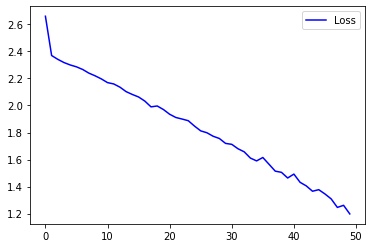

In [4]:
plt.plot(range(0,50),history.history['loss'],c="b")
plt.legend(['Loss'])
plt.show()